# Analysis

There are rides in an urban area than the rural and suburban areas probably because population density is higher within a city.

The fares are more expensive in rural areas compared to urban probably due to the distance to a destination.

Urban areas have the lowest fares on average due to the shorter distance to travel within a city. 


In [3]:
# Import pandas, numpy, maplotlib, or seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Pull in City Data and Ride Data
CityData = pd.read_csv("city_data.csv")
RideData = pd.read_csv("ride_data.csv")
RideData.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
#Validating data in Ride Date to make sure there are no duplicate rows, using city+date+fare+ride_id as unique ID
RGroup = RideData.groupby(['city']+['date']+['fare']+['ride_id'])
a = int(len(RGroup)) 
b = int(len(RideData))

if a == b:
    print ('no need to consolidate RideData')
else:
    RideData = RideData.drop.duplicates()
#Validating data in City Date to make sure there are no duplicate rows, using city as unique ID (known Type has unique value)
c = CityData['city'].nunique()
d = CityData['city'].count()
    
if c == d:
    print ('no need to consolidate CityData')
#If any City has more than one row of data, combine the driver_count so that each city only has one driver count
#known Type has unique value
else:
    CGroup = CityData.groupby(['city']+['type'])
    CityData = CGroup['driver_count'].sum()
    CityData = CityData.reset_index()
    e = CityData['city'].count()
    print ('CityData consolidated from '+str(d)+' to ' +str(e))

no need to consolidate RideData
no need to consolidate CityData


In [6]:
#Pull the Type and Driver_Count to the RideData from CityData
CityRide = pd.merge(RideData,CityData,how='left',on='city')
CityRide.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
# calculate variables that will be used in the Bubble Plot# calcul 
GCityRide = CityRide.groupby(['city']+['type']+['driver_count'])

# Calculate Average fare($) Per City
Ave_Fare = GCityRide['fare'].mean()

# Calculate Total Number of Rides Per City
Total_Rides = GCityRide['ride_id'].count()

df = pd.DataFrame({"AveFare":Ave_Fare, "TotalRides":Total_Rides})
df = df.reset_index()

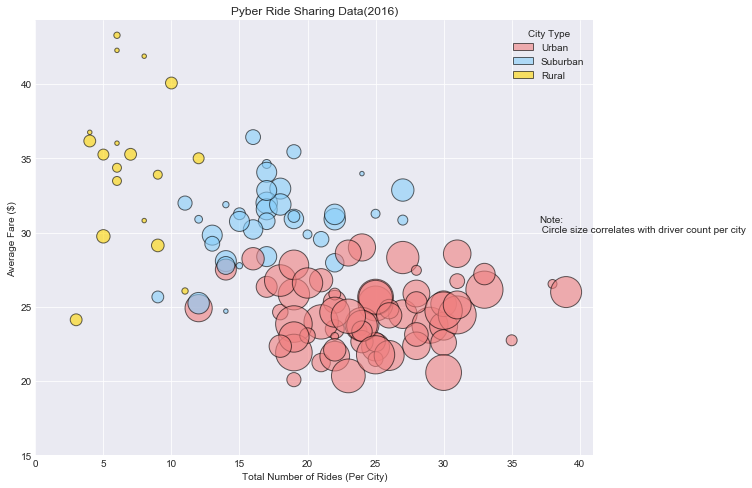

In [8]:
# use the scatter function# use th 
colors = {'Urban':'lightcoral', 'Suburban':'lightskyblue', 'Rural':'gold'}
7
#update legend
import matplotlib.patches as mpatches

U = mpatches.Circle((0.5, 0.5), 0.1, facecolor="lightcoral",alpha=.6,edgecolor="black",linewidth=1)
S = mpatches.Circle((0.5, 0.5), 0.1, facecolor="lightskyblue",alpha=.6,edgecolor="black", linewidth=1)
R = mpatches.Circle((0.5, 0.5), 0.1, facecolor="gold",alpha=.6,edgecolor="black", linewidth=1)

#Draw Bubble Chart
sns.set_style("darkgrid") 
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(df['TotalRides'], df['AveFare'], s=df['driver_count']*20, c=df['type'].apply(lambda x:colors[x]),alpha=.6, linewidth=1, edgecolor='black')
ax.legend([U,S,R],["Urban","Suburban","Rural"],title= 'City Type')

 # Set x and y limits
ax.set_xlim(0, max(df['TotalRides'])+2)
ax.set_ylim(15, max(df['AveFare'])+1)
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.set_title("Pyber Ride Sharing Data(2016)")
ax.text(37,30,'Note:\n Circle size correlates with driver count per city')

plt.show()

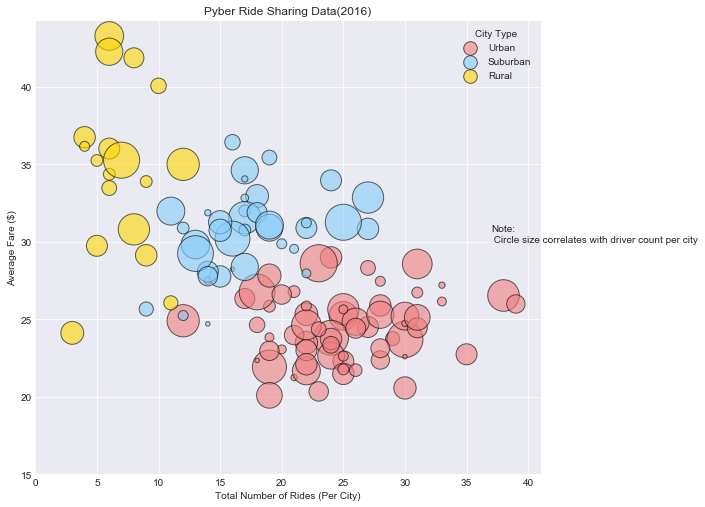

In [9]:
# use the scatter function
colors = {'Urban':'lightcoral', 'Suburban':'lightskyblue', 'Rural':'gold'}


#Draw Bubble Chart
sns.set_style("darkgrid") 
g = sns.lmplot(x="TotalRides", y='AveFare', data=df, hue ='type',size = 7,
           aspect=1.1,palette=colors, 
           scatter_kws={"s":df['driver_count']*20,"alpha":.6,"linewidth":1, 
                        "edgecolor":'black',"marker":'o'}, fit_reg=False,
           legend_out=False)
g = (g.set_axis_labels("Total Number of Rides (Per City)","Average Fare ($)").set(xlim=(0, max(df['TotalRides'])+2), ylim=(15, max(df['AveFare'])+1)))
plt.title("Pyber Ride Sharing Data(2016)")
plt.text(37,30,'Note:\n Circle size correlates with driver count per city')
plt.legend(markerscale=.5, title="City Type")
plt.show()

In [10]:
# calculate variables that will be used in the Pie Chart# calcul 
GType = CityRide.groupby(['type'])
GGType = CityData.groupby(['type'])

# Calculate Total fare($) Per CityType
TFare = GType['fare'].sum()

# Calculate Total Rides Per CityType
TRides = GType['ride_id'].count()

# Calculate Total Drivers Per CityType
TDrivers = GGType['driver_count'].sum()

df1 = pd.DataFrame({"TotalFare":TFare, "TotalRides":TRides, "TotalDrivers":TDrivers})
df1 = df1.reset_index()
df1

,type,TotalDrivers,TotalFare,TotalRides
0,Rural,78,4327.93,125
1,Suburban,490,19356.33,625
2,Urban,2405,39854.38,1625


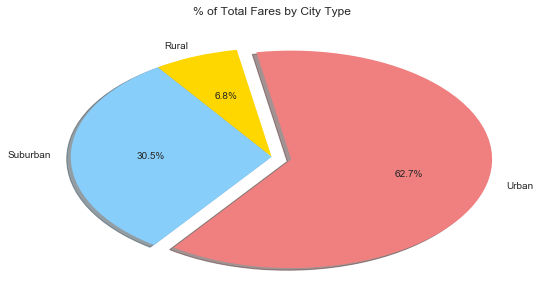

In [11]:
# Plot % of Fares by City Type
# Labels for the sections of our pie chart
labels = df1['type']

# The values of each section of the pie chart
sizes = df1['TotalFare']

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Creates the pie chart based upon the values above
# update graph size 
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=100)
            
# Update Title
plt.title("% of Total Fares by City Type")
# Prints our pie chart to the screen
plt.show()

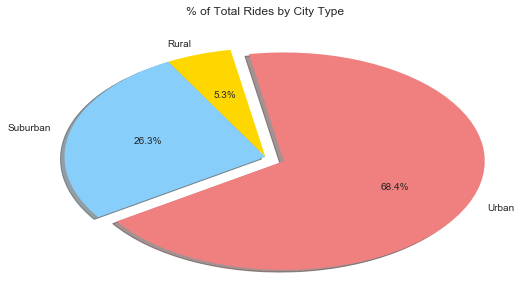

In [12]:
# Plot % of Total Rides by City Type# Plot % 
# Labels for the sections of our pie chart
labels = df1['type']

# The values of each section of the pie chart
sizes = df1['TotalRides']

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Creates the pie chart based upon the values above
# update graph size 
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=100)
            
# Update Title
plt.title("% of Total Rides by City Type")
# Prints our pie chart to the screen
plt.show()